### Introduction
Now you have learned the concept of **Zel'dovich approximation**, which is stating that the displacement field $\Psi(\bold{q})$ at linear order at **any redshifts** can be approximated once you know the initial potential field. 

You might be thinking, that sounds too good to be true. The motion of particles should be determined by the distribution of matter and the velocity of particles at that instant. And both the matter distribution and the velocity are ever changing so you need to carry out the simulation step by step. How is it possible to know the displacement of particles from $z=99$ to $z=0$ **in one step** only given the matter distribution at $z=99$? Good spirit! As a researcher, you need to be sceptical. But in this notebook, you will find it out yourself that sometimes nature can be as magical as the Zel'dovich approximation.

### Setup
We will work with a code (`sheet_unfolding`, written by Jens Stücker) for 2d simulations as this can help you to master the key concepts for running simulations and greatly reduce the computation time. The code is only well implemented for EdS universe, so we will keep $\Omega_\mathrm{m}=1,\Omega_{\Lambda}=0$.

### Steps
* Get the initial condition
* Get the matter distribution at given redshifts using the Zel'dovich approximation
* Run a real simulation with the same initial condition, compare the results with those from Zel'dovich approximation

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import sys
sys.path.append("../../../")

import sheet_unfolding.sim as sim


## Initial condition

First, let's have a look at the initial conditions. We will need to use the class `IC2DCosmo` defined in "sheet_unfolding/sim/ic.py" to generate the initial condition. You should go to the definition of the class to have an idea about what it does and how to use it.

To get the same plot, use L=100., a=0.01, sigma8=0.8, use 3 different smoothing scale rs=5,2,1, and use the "get_delta" function to get the overdensity distribution. Plot the overdensity using the 'imshow' function, compare your result with others!

* relevant classes: `sim.ic.IC2DCosmo`
* relevant functions: `sim.ic.IC2DCosmo.get_delta()`

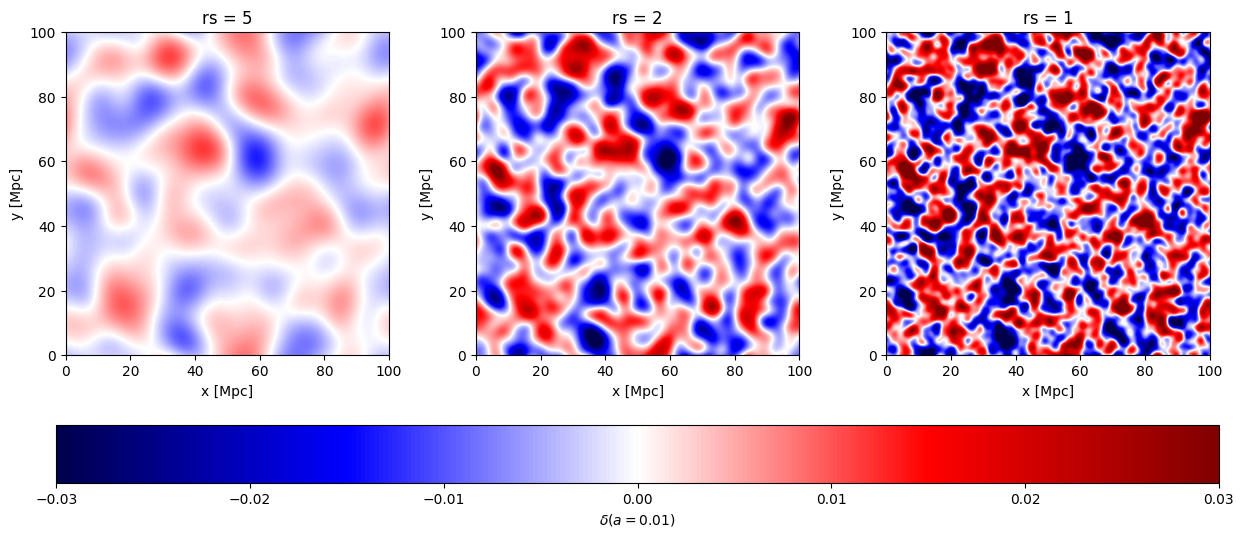

In [10]:
L = 100.
fig, axs = plt.subplots(1,3, figsize=(15,6))

myic = sim.ic.IC2DCosmo(512, L=L, rs=5., Omega_m=1.) # random seed is set to 42 by default. add "seed=..." to change it.
im = axs[0].imshow(myic.get_delta(a=0.01).T, origin="lower", cmap="seismic", extent=[0,L,0,L], vmin=-0.03, vmax=0.03)
myic = sim.ic.IC2DCosmo(512, L=L, rs=2., Omega_m=1.) # random seed is set to 42 by default. add "seed=..." to change it.
axs[1].imshow(myic.get_delta(a=0.01).T, origin="lower", cmap="seismic", extent=[0,L,0,L], vmin=-0.03, vmax=0.03)
myic = sim.ic.IC2DCosmo(512, L=L, rs=1., Omega_m=1.) # random seed is set to 42 by default. add "seed=..." to change it.
axs[2].imshow(myic.get_delta(a=0.01).T, origin="lower", cmap="seismic", extent=[0,L,0,L], vmin=-0.03, vmax=0.03)
plt.colorbar(im, ax=axs, orientation="horizontal", label=r"$\delta (a = 0.01)$")

axs[0].set_title("rs = 5")
axs[1].set_title("rs = 2")
axs[2].set_title("rs = 1")

for ax in axs:
    ax.set_xlabel("x [Mpc]")
    ax.set_ylabel("y [Mpc]")
    
plt.savefig("img/Ics.png")

## Zel'dovich approximation 

In this subsection, we will get the particle position given the initial condition using the Zel'dovich approximation. And we will compare the matter distribution with the linear overdensity field $\delta_{\mathrm{L}}(a)$ defined by
$$\delta_{\mathrm{L}}(a)=\delta_{\mathrm{L}}(a=0.01)\times\frac{D(a)}{D(a=0.01)},$$
where $D(a)$ is the growth factor.

To get the same plots, use L=100., sigma8=0.8, rs=0.5. Get the results for $a=0.02,0.2,0.5,1$ 


* relevant classes: `sim.ic.IC2DCosmo`
* relevant functions: `sim.ic.IC2DCosmo.get_delta()`,`sim.ic.IC2DCosmo.get_x()`

To not over-crowd the image, plot only every 4th particle and specify the marker size by `s=0.5`.

If you use plt.imshow, watch out to transpose the image correctly!

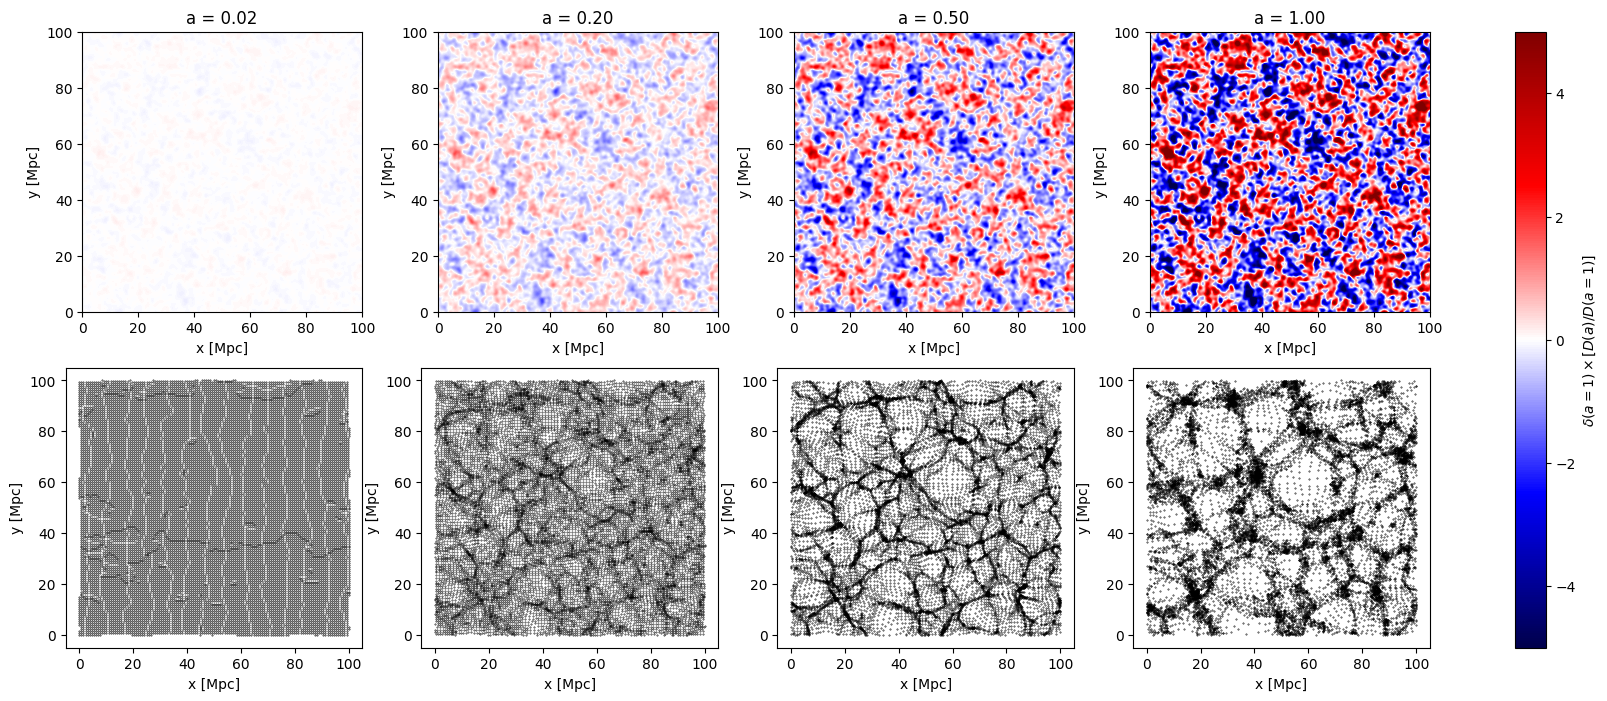

In [3]:
aini = 0.02
L = 100.
myic = sim.ic.IC2DCosmo(512, sigma8=0.8, L=L, rs=0.5, vec3d=True, Omega_m=1.)# aic=aini, 

fig, axs = plt.subplots(2,4, figsize=(22,8))

for i,a in enumerate((0.02,0.2,0.5,1.0)):
    im = axs[0,i].imshow(myic.get_delta(a=a).T, origin="lower", cmap="seismic", extent=[0,L,0,L], vmin=-5, vmax=5)
    
    pos = myic.get_x(a=a)

    axs[1,i].scatter(pos[::4,::4].reshape(-1,2)[:,0], pos[::4,::4].reshape(-1,2)[:,1], s=0.5,marker=".", color="black")
    
    axs[0,i].set_title("a = %.2f" % a)
plt.colorbar(im, ax=axs, orientation="vertical", label=r"$\delta (a = 1)\times[D(a)/D(a=1)]$")

for ax in axs.flat: 
    # ax.set_xlim(0,30)
    # ax.set_ylim(0,30)

    ax.set_xlabel("x [Mpc]") 
    ax.set_ylabel("y [Mpc]")
     
plt.savefig("img/Ics_ZA.png")

Now, We will compare the **linear overdensity field** $\delta_{\mathrm{L}}(a)$ with the overdensity field $\delta_{\mathrm{Z}}(a)$ calculated from the results of Zel'dovich approximation. $\delta_{\mathrm{Z}}(a)$ can be calculated by dividing the 2d plane into 2d grids, let's say the number of particle in the $i_{\mathrm{th}}$ grid cell is $n_i$, then the $\delta_{\mathrm{Z}}(a)$ for the $i_{\mathrm{th}}$ grid cell is
$$\delta_{\mathrm{Z}}(a)=\frac{n_i-\bar{n}}{\bar{n}}.$$

* relevant functions: `np.histogram2d()`

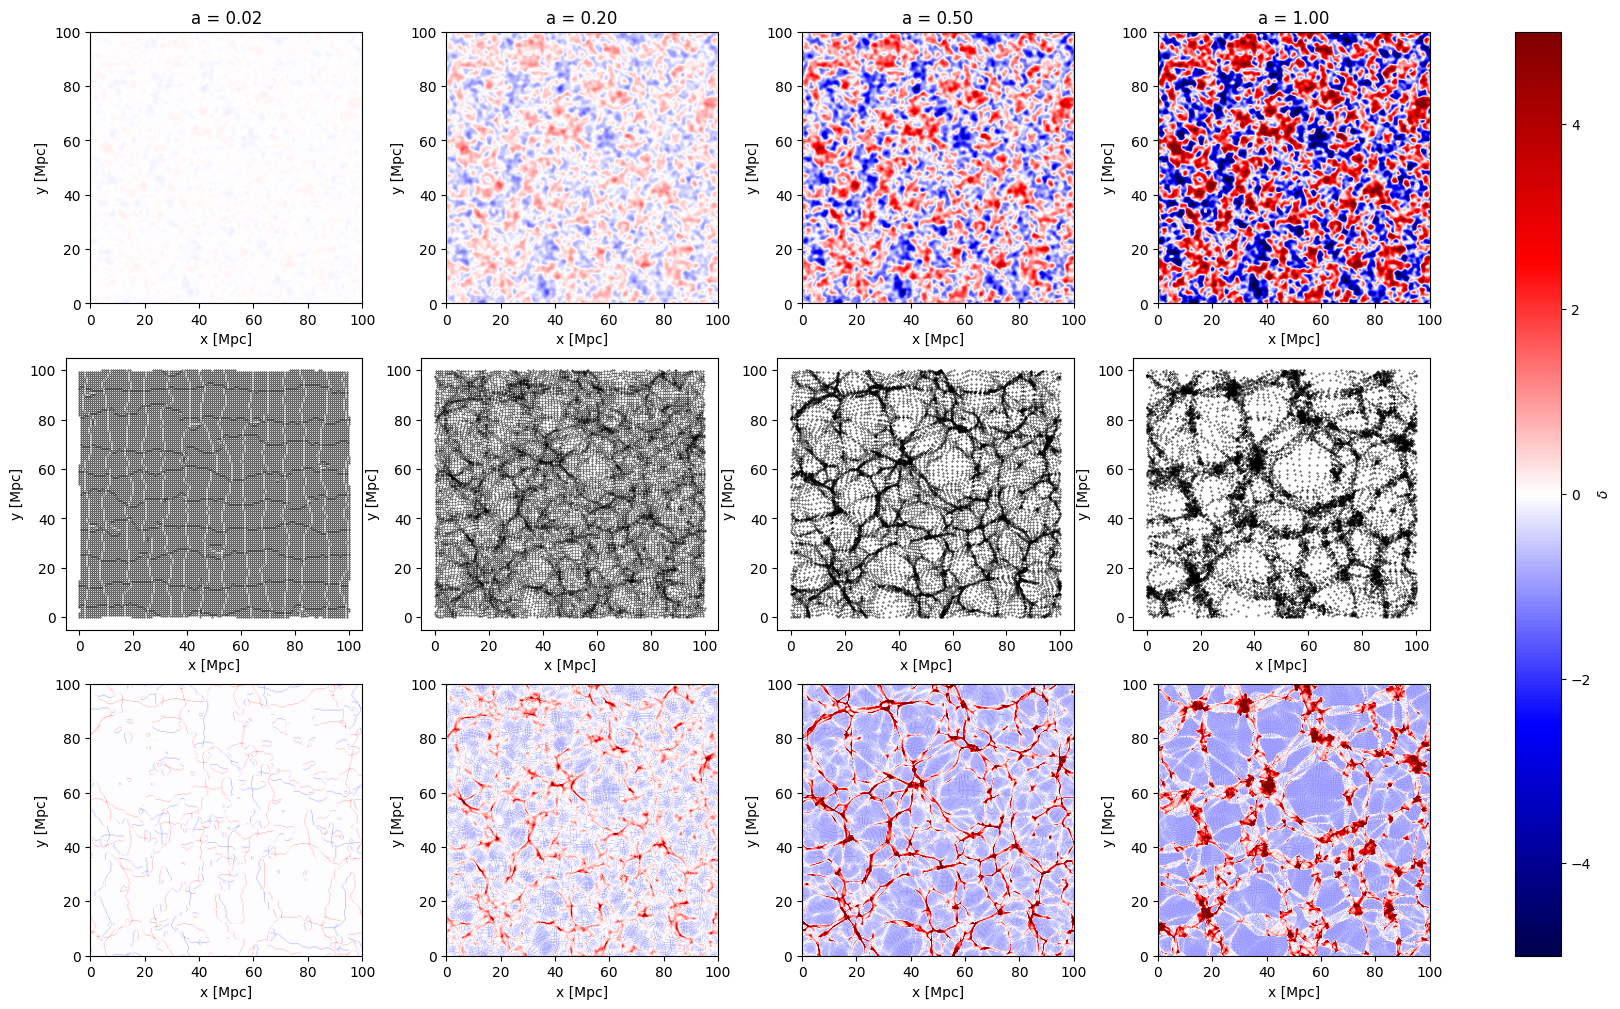

In [11]:
aini = 0.02
L = 100.
myic = sim.ic.IC2DCosmo(512,seed=42, L=L,rs=0.5,  Omega_m=1.)#  aic=0.5,vec3d=True,

fig, axs = plt.subplots(3,4, figsize=(22,12))

for i,a in enumerate((0.02,0.2,0.5, 1.)):
    im = axs[0,i].imshow(myic.get_delta(a=a).T, origin="lower", cmap="seismic", extent=[0,L,0,L], vmin=-5, vmax=5)
    
    pos = myic.get_x(a=a)

    axs[1,i].scatter(pos[::4,::4].reshape(-1,2)[:,0], pos[::4,::4].reshape(-1,2)[:,1],s=0.5 ,marker=".", color="black")
    
    hist,_,_ = np.histogram2d(pos[...,0].flatten(), pos[...,1].flatten(), bins=np.linspace(0., L, 256))
    axs[2,i].imshow(((hist-np.mean(hist))/np.mean(hist)).T, origin="lower", cmap="seismic", extent=[0,L,0,L], vmin=-5, vmax=5)
    
    axs[0,i].set_title("a = %.2f" % a)
plt.colorbar(im, ax=axs, orientation="vertical", label=r"$\delta$")

for ax in axs.flat:
    # ax.set_xlim(0,20)
    # ax.set_ylim(0,20)

    ax.set_xlabel("x [Mpc]")
    ax.set_ylabel("y [Mpc]")
    
plt.savefig("img/IC_ZA_dens.png")

## Compare with a real simulation

The goal of this subsection is to see how similar the LSS derived from real simulations and from Zel'dovich approximations can be. We will explore how to run a simulation later. For now, you only need to know the following codes can give you the position of particles from a real simulation.
```
aini = 0.02
L = 100.
myic = sim.ic.IC2DCosmo(512,seed=42, L=L,rs=0.5,  Omega_m=1.)
mysim = sim.CosmologicalSimulation2d(myic, aic=aini, ngrid_pm=512, verbose=0)
mysim.integrate_till(a)
pos_x = mysim.pos[...,0]
pos_y = mysim.pos[...,1]
```

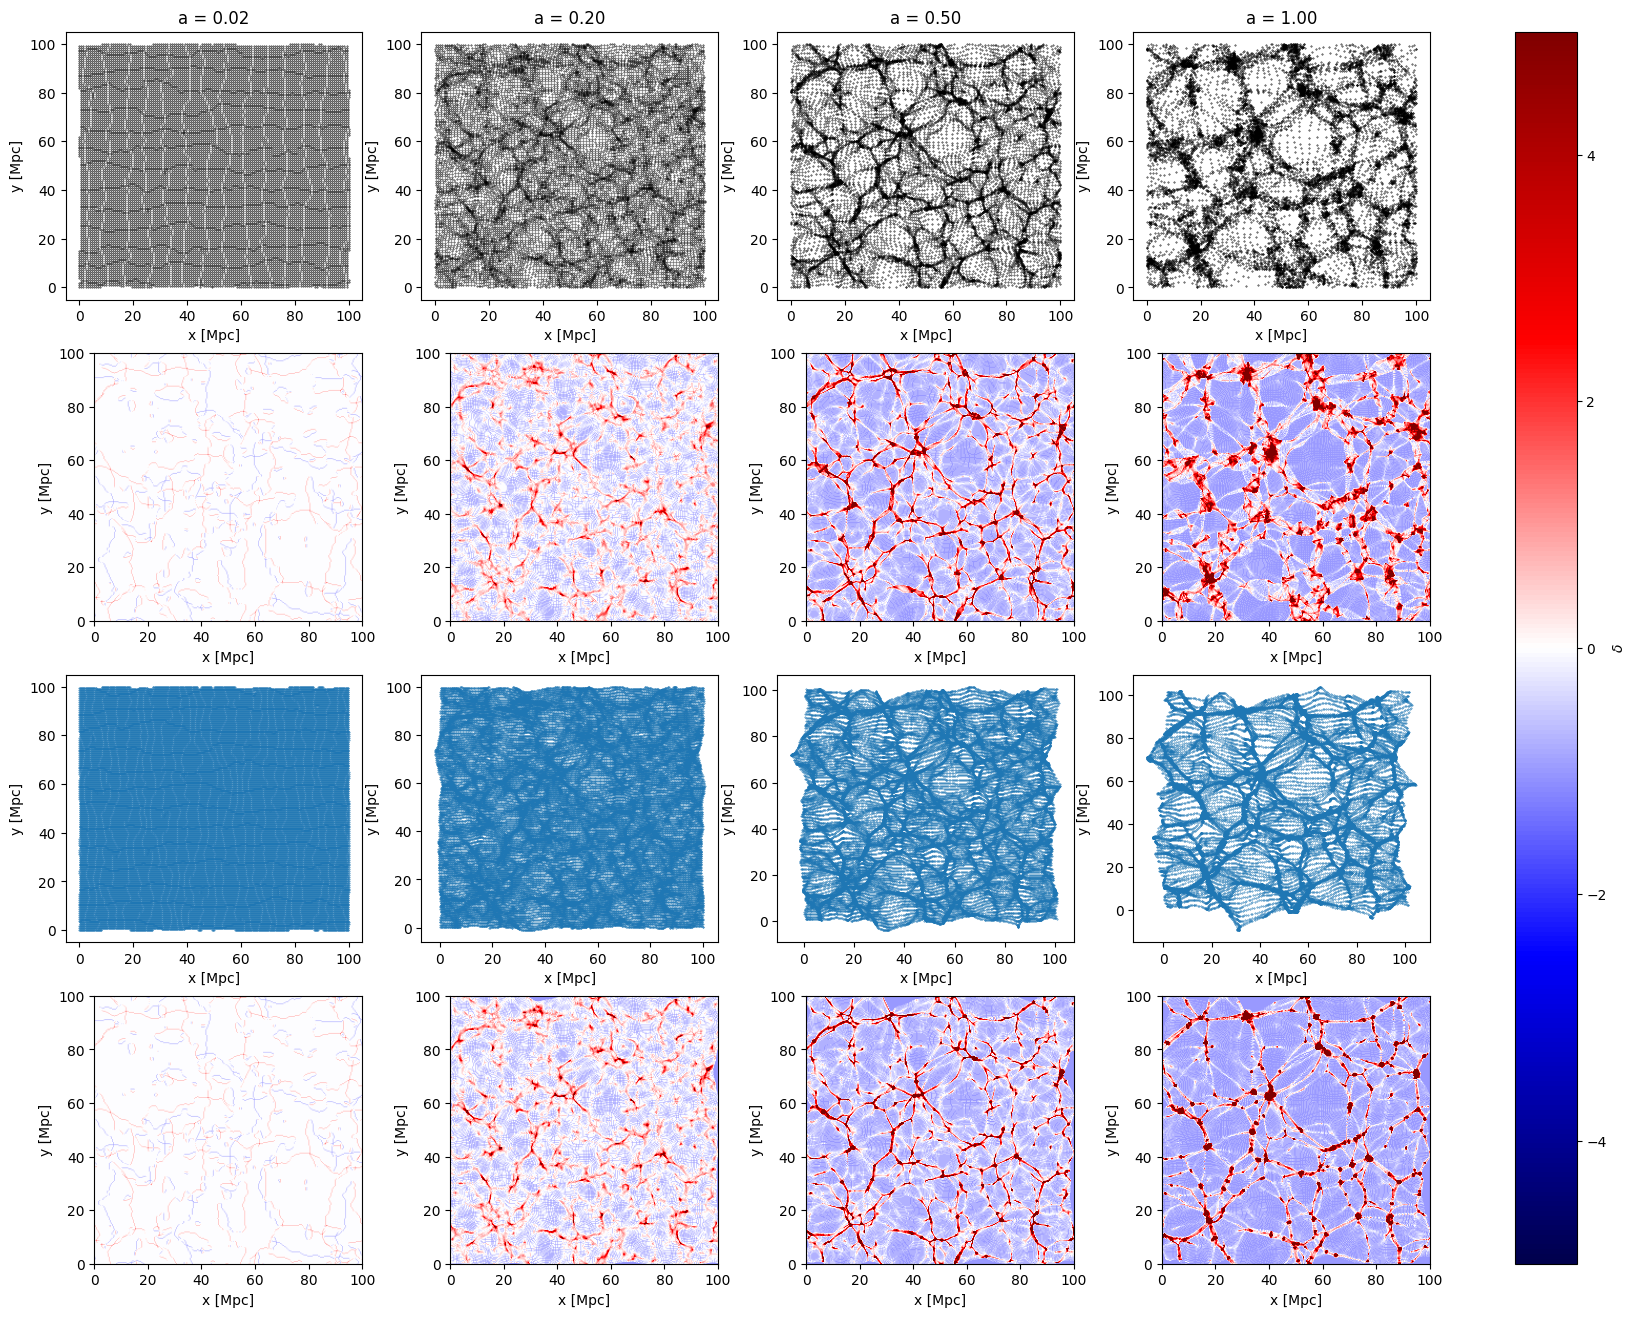

In [12]:
aini = 0.02
L = 100.
myic = sim.ic.IC2DCosmo(512,seed=42, L=L,rs=0.5,  Omega_m=1.)#  aic=0.5,vec3d=True,
mysim = sim.CosmologicalSimulation2d(myic, aic=aini, ngrid_pm=512, verbose=0)


fig, axs = plt.subplots(4,4, figsize=(22,16))

for i,a in enumerate((0.02,0.2,0.5, 1.)):
    # im = axs[0,i].imshow(myic.get_delta(a=a).T, origin="lower", cmap="seismic", extent=[0,L,0,L], vmin=-5, vmax=5)
    
    pos = myic.get_x(a=a)

    axs[0,i].scatter(pos[::4,::4].reshape(-1,2)[:,0], pos[::4,::4].reshape(-1,2)[:,1],s=0.5 ,marker=".", color="black")
    
    hist,_,_ = np.histogram2d(pos[...,0].flatten(), pos[...,1].flatten(), bins=np.linspace(0., L, 256))
    axs[1,i].imshow(((hist-np.mean(hist))/np.mean(hist)).T, origin="lower", cmap="seismic", extent=[0,L,0,L], vmin=-5, vmax=5)
    
    axs[0,i].set_title("a = %.2f" % a)

    mysim.integrate_till(a)
    axs[2,i].scatter(mysim.pos[...,0].flatten()[::4], mysim.pos[...,1].flatten()[::4], marker=".", s=0.5)
    hist_,_,_ = np.histogram2d(mysim.pos[...,0].flatten(), mysim.pos[...,1].flatten(), bins=np.linspace(0., L, 256))
    axs[3,i].imshow(((hist_-np.mean(hist_))/np.mean(hist_)).T, origin="lower", cmap="seismic", extent=[0,L,0,L], vmin=-5, vmax=5)


plt.colorbar(im, ax=axs, orientation="vertical", label=r"$\delta$")

for ax in axs.flat:
    # ax.set_xlim(0,20)
    # ax.set_ylim(0,20)

    ax.set_xlabel("x [Mpc]")
    ax.set_ylabel("y [Mpc]")
    
plt.savefig("img/IC_ZA_dens.png")